[![Open In Binder](https://static.mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/OleBo/MathSo/main?filepath=/notebooks/notebook10.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OleBo/MathSo/blob/main/notebooks/notebook10.ipynb)


[browse](http://colab.research.google.com/github/OleBo/MathSo/)

# 7. Numerische Integration

In [1]:
from math import *
import numpy as np
from matplotlib import pyplot as plt

## 7.2 Summierte Newton-Cotes-Formeln

In [2]:
def trapezoidal(f, a, b, n):
    """Approximiert das Integral von f auf [a,b] nach der summierten Trapezregel mit n Teilintervallen."""
    h = (b-a)/n 
    x = np.linspace(a, b, n+1)
    y = f(x)
    return .5*h*(y[0] + 2.*np.sum(y[1:n]) + y[n])

In [3]:
def simpson(f, a, b, n):
    """Approximiert das Integral von f auf [a,b] nach der summierten Simpson-Regel mit n Teilintervallen."""
    if not (n % 2) == 0:
        raise Exception("n muss gerade sein.")
    h = (b-a)/n 
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h/3.*(y[0] + 4.*np.sum(y[1:n:2]) + 2.*np.sum(y[2:n-1:2]) + y[n])

### Beispiel

$$I := \int_0^{\pi/2} e^x \sin x \, d x = \frac{e^{\pi/2} + 1}{2}$$

In [4]:
def f(x):
    return np.exp(x)*np.sin(x)

I = 2.9052386904826757


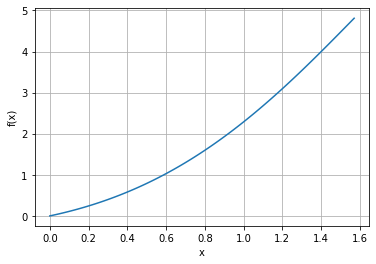

In [5]:
a = 0
b = pi/2
I = .5*(exp(.5*pi) + 1)
x = np.linspace(a,b,100)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
print("I = {}".format(I))

Trapezregel

In [6]:
n = 2
print("{:10} {:21} {:12} {:12}".format("h", "Approximation", "Fehler", "Konvergenzfaktor"))
Err_old = 0
while n < 1e8:
    T = trapezoidal(f, a, b, n)
    Err = abs(T - I)
    print("{:<10.2e} {:<21.16f} {:<12.4e} {:<12.4e}".format((b-a)/n, T, Err, Err_old/Err))
    Err_old = Err
    n *= 2

h          Approximation         Fehler       Konvergenzfaktor
7.85e-01   3.1071308645409572    2.0189e-01   0.0000e+00  
3.93e-01   2.9545892845867265    4.9351e-02   4.0910e+00  
1.96e-01   2.9175048077965977    1.2266e-02   4.0233e+00  
9.82e-02   2.9083007284906195    3.0620e-03   4.0059e+00  
4.91e-02   2.9060039189585916    7.6523e-04   4.0015e+00  
2.45e-02   2.9054299800325620    1.9129e-04   4.0004e+00  
1.23e-02   2.9052865117720010    4.7821e-05   4.0001e+00  
6.14e-03   2.9052506457363716    1.1955e-05   4.0000e+00  
3.07e-03   2.9052416792918092    2.9888e-06   4.0000e+00  
1.53e-03   2.9052394376846911    7.4720e-07   4.0000e+00  
7.67e-04   2.9052388772831628    1.8680e-07   4.0000e+00  
3.83e-04   2.9052387371827959    4.6700e-08   4.0000e+00  
1.92e-04   2.9052387021577055    1.1675e-08   4.0000e+00  
9.59e-05   2.9052386934014329    2.9188e-09   4.0000e+00  
4.79e-05   2.9052386912123649    7.2969e-10   4.0000e+00  
2.40e-05   2.9052386906650978    1.8242e-10   4.0000

Simpson-Regel

In [7]:
n = 2
print("{:10} {:21} {:12} {:12}".format("h", "Approximation", "Fehler", "Konvergenzfaktor"))
Err_old = 0
while n < 1e4:
    S = simpson(f, a, b, n)
    Err = abs(S - I)
    print("{:<10.2e} {:<21.16f} {:<12.4e} {:<12.4e}".format((b-a)/n, S, Err, Err_old/Err))
    Err_old = Err
    n *= 2

h          Approximation         Fehler       Konvergenzfaktor
7.85e-01   2.8834611193628916    2.1778e-02   0.0000e+00  
3.93e-01   2.9037420912686494    1.4966e-03   1.4551e+01  
1.96e-01   2.9051433155332211    9.5375e-05   1.5692e+01  
9.82e-02   2.9052327020552928    5.9884e-06   1.5927e+01  
4.91e-02   2.9052383157812485    3.7470e-07   1.5982e+01  
2.45e-02   2.9052386670572186    2.3425e-08   1.5995e+01  
1.23e-02   2.9052386890184807    1.4642e-09   1.5999e+01  
6.14e-03   2.9052386903911613    9.1514e-11   1.6000e+01  
3.07e-03   2.9052386904769558    5.7199e-12   1.5999e+01  
1.53e-03   2.9052386904823178    3.5794e-13   1.5980e+01  
7.67e-04   2.9052386904826526    2.3093e-14   1.5500e+01  
3.83e-04   2.9052386904826735    2.2204e-15   1.0400e+01  
1.92e-04   2.9052386904826757    0.0000e+00   inf         


/var/folders/q3/x4m21yzx5zg2bqzxxrmym06m0000gn/T/ipykernel_19670/2838051654.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  print("{:<10.2e} {:<21.16f} {:<12.4e} {:<12.4e}".format((b-a)/n, S, Err, Err_old/Err))
